In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [99]:
def minimos_cuadrados_incertidumbre(x,y,t,i,palabras,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x+intercepto)
    normalize_residuales = (y-(pendiente*x+intercepto))/i
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i,fmt="o", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)       
        axs[0].plot(x,pendiente*x+intercepto, label = "Regresión lineal", linestyle='--', color= "Black")
        axs[1].scatter(x,residuales, s= 4)
        axs[2].scatter(x,normalize_residuales, s = 4)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel(palabras[0]+" \n")
        axs[1].set_ylabel('Residuales '+ palabras[1] + "\n" )
        axs[2].set_ylabel('Residuales\n Normalizados ' + palabras[1])
        plt.xlabel(palabras[2])
        axs[0].legend()
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    print("pendiente = ", pendiente , " +/- ", error_m)
    print("Intercepto = ", intercepto , " +/- ", error_inter)
    return pendiente,intercepto, error_inter, error_m, normalize_residuales
def Durbin_Watson(R):
    a_1 = R[1:]
    a_2 = R[:-1]
    a = (a_1-a_2)**2
    num = np.sum(a)
    dem = np.sum(R**2)
    D = num/dem
    print(D)
    return D


def lag_plot(R):
    plt.scatter(R[:-1],R[1:])
    plt.ylabel("Residuales Normalizados (i)")
    plt.xlabel("Residuales Normalizados (i-k)")
    plt.axhline(y = 0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

6.2

pendiente =  2.0284648216102745  +/-  0.05197830827721802
Intercepto =  -0.9474964662767381  +/-  3.386858673521736
1.5517903818095427


1.5517903818095427

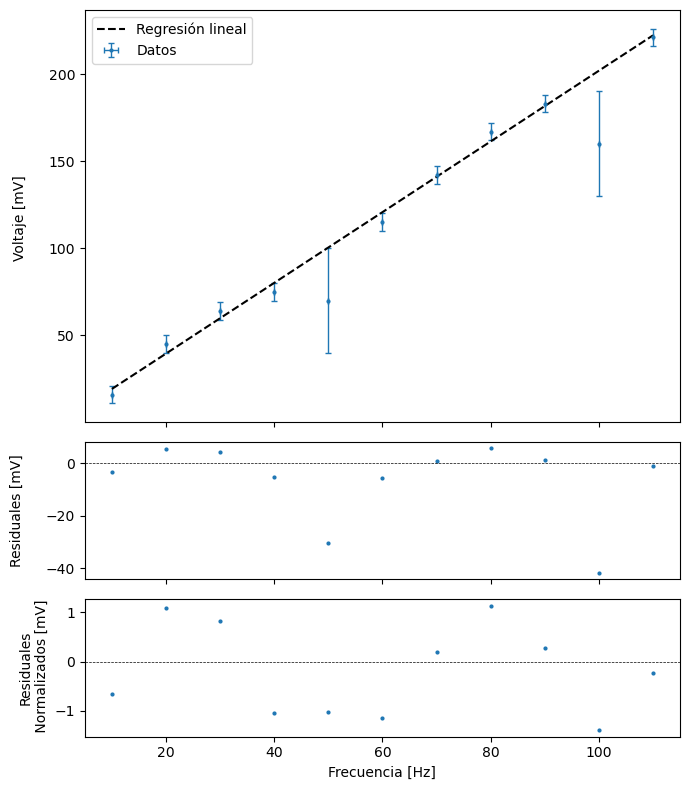

In [114]:
f = np.array([10,20,30,40,50,60,70,80,90,100,110])
V = np.array([16,45,64,75,70, 115, 142, 167, 183,160, 221])
e = np.array([5,5,5,5,30,5,5,5,5,30,5])
palabras = ["Voltaje [mV]", '[mV]',"Frecuencia [Hz]"]
r = minimos_cuadrados_incertidumbre(f,V,0,e,palabras)
Durbin_Watson(r[4])



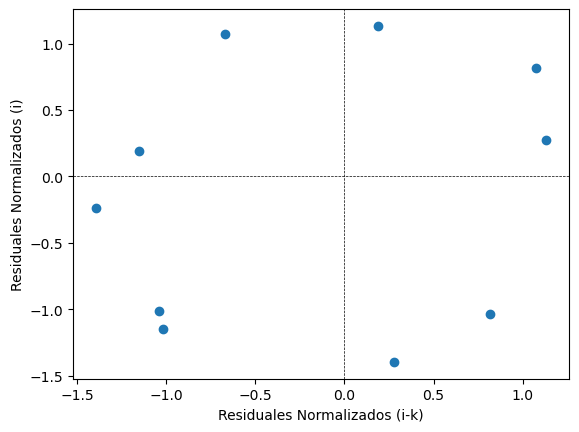

In [115]:
lag_plot(r[4])

6.4

In [117]:
def objective(params):
    m, b = params
    return np.sum(((V - (m * f + b)) ** 2) / e**2)

# Estimación inicial para los parámetros [m, b]
initial_guess = [1, 1]

# Realizar la minimización
result = minimize(objective, initial_guess)

m_opt, b_opt = result.x
print(m_opt, b_opt)

2.0284647943880425 -0.9474947332050837


6.5

pendiente =  1.2397219665412587  +/-  0.03925005362824148
Intercepto =  -0.10700883885508011  +/-  0.03266514103078884


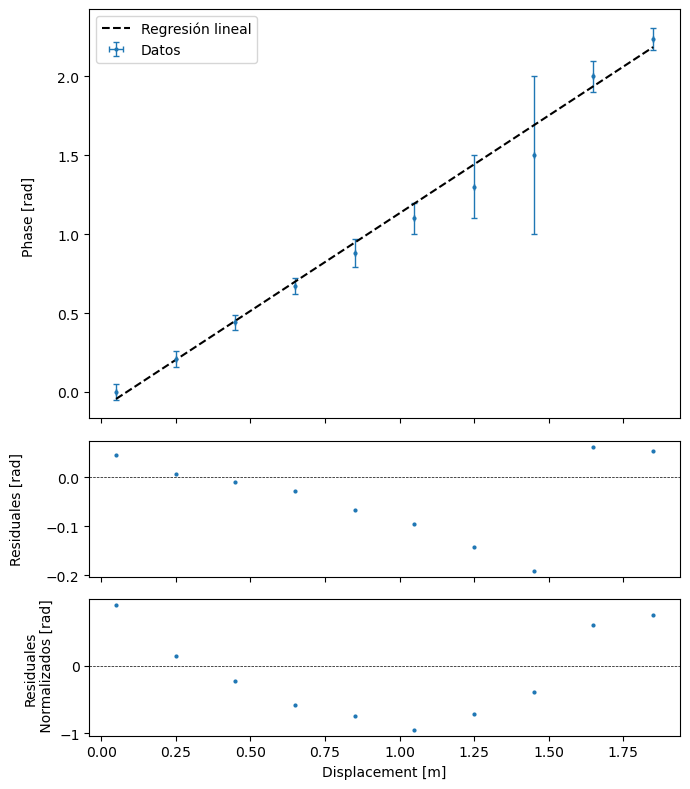

In [101]:
x = np.array([0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45, 1.65, 1.85])
y = np.array([0, 0.21, 0.44, 0.67, 0.88, 1.1, 1.3, 1.5, 2, 2.24])
e = np.array([0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.2, 0.5, 0.1, 0.07]) 
palabras = ["Phase [rad]", '[rad]',"Displacement [m]"]
r = minimos_cuadrados_incertidumbre(x,y,0,e,palabras)


0.48722436169249


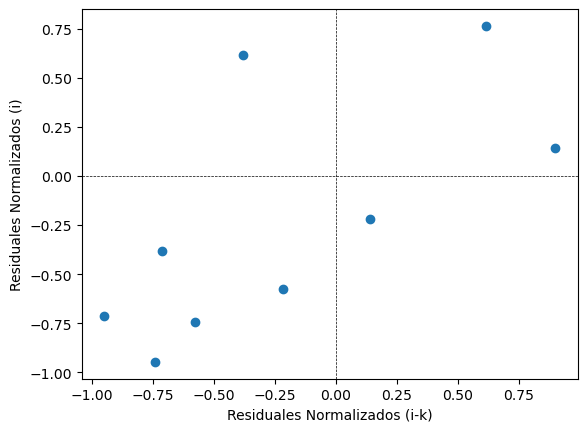

In [103]:
Durbin_Watson(r[4])
lag_plot(r[4])

6.6

pendiente =  49.89790121339644  +/-  0.31658015706387804
Intercepto =  1.7267713877515376  +/-  0.9872895098081177


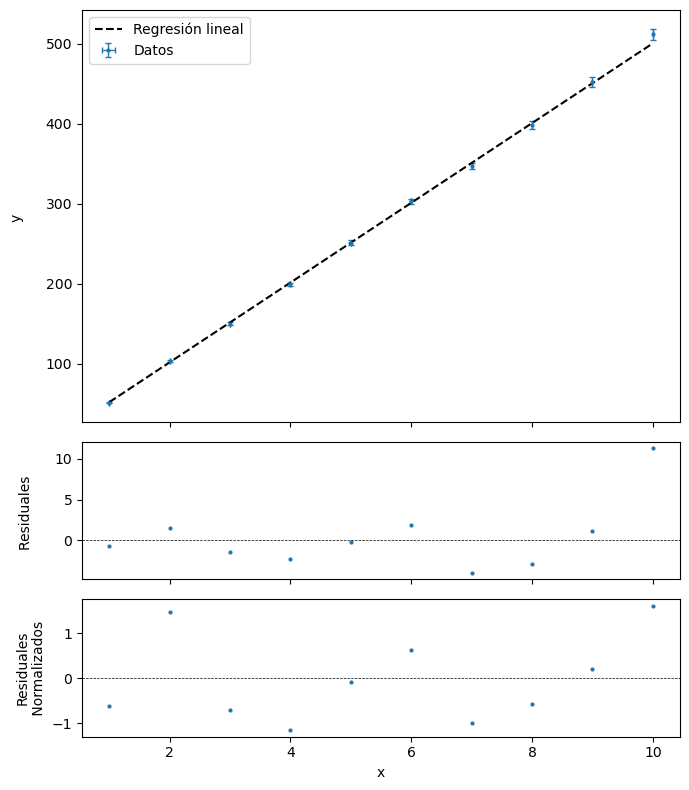

In [105]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([51,103, 150, 199, 251, 303, 347, 398, 452, 512])
e = np.array([1,1,2,2,3,3,4,5,6,7])

palabras = ["y", '',"x"]
r = minimos_cuadrados_incertidumbre(x,y,0,e,palabras)

pendiente =  50.472727272727276  +/-  0.4403855060505442
Intercepto =  -1.0  +/-  2.7325202042558927


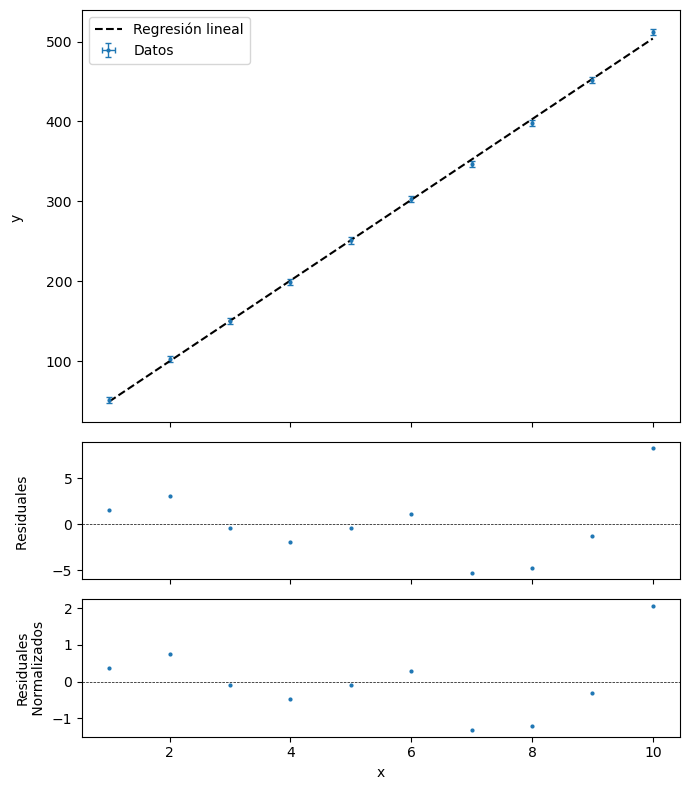

In [106]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([51,103, 150, 199, 251, 303, 347, 398, 452, 512])
e = np.ones(len(x))*4

palabras = ["y", '',"x"]
r = minimos_cuadrados_incertidumbre(x,y,0,e,palabras)

pendiente =  51.19874715261959  +/-  0.155877022570768
Intercepto =  -0.45340345705480367  +/-  1.0979945499870805


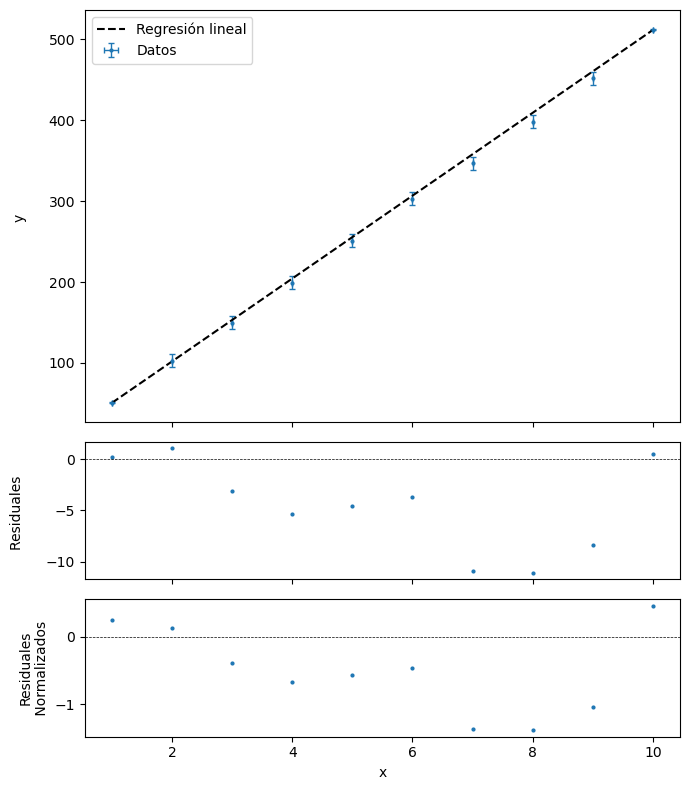

In [107]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([51,103, 150, 199, 251, 303, 347, 398, 452, 512])
e = np.array([1,8,8,8,8,8,8,8,8,1])

palabras = ["y", '',"x"]
r = minimos_cuadrados_incertidumbre(x,y,0,e,palabras)

# Punto 8

In [1]:
from scipy.stats import chi2

# Define chi-square values and degrees of freedom
chi2_min_1 = 15.9
df_1 = 10

chi2_min_2 = 159
df_2 = 100

# Calculate chi2_nu (a & c)
chi2_nu_1 = chi2_min_1 / df_1
chi2_nu_2 = chi2_min_2 / df_2

# Calculate p-values (b & d)
p_value_1 = 1 - chi2.cdf(chi2_min_1, df_1)
p_value_2 = 1 - chi2.cdf(chi2_min_2, df_2)

punto 6.3

In [13]:
import math
from scipy import integrate

def calcular_E(a, b):
    # Definir la función a integrar
    def integrand(x):
        return math.exp(-x**2 / 2)

    # Calcular la integral definida de la función
    integral_value, _ = integrate.quad(integrand, a, b)

    # Calcular el resultado final
    E = 2500 / (math.sqrt(2 * math.pi)) * integral_value

    return E
intervals = [
    (-float('inf'), -2.5), (-2.5, -2), (-2, -1.5),
    (-1.5, -1), (-1, -0.5), (-0.5, 0),
    (0, 0.5), (0.5, 1), (1, 1.5),
    (1.5, 2), (2, 2.5), (2.5, float('inf'))
]


a=1
E=[]
for i in intervals:
  print("Intervalo ",a, ":", round(calcular_E(i[0], i[1])))
  E.append(round(calcular_E(i[0], i[1])))
  a+=1
E=np.array(E)
O = np.array([9, 48, 142, 154, 438, 521, 405, 318, 299, 100, 57, 9])

chi_square = np.sum((O - E)**2 / E)
print(chi_square)

Intervalo  1 : 16
Intervalo  2 : 41
Intervalo  3 : 110
Intervalo  4 : 230
Intervalo  5 : 375
Intervalo  6 : 479
Intervalo  7 : 479
Intervalo  8 : 375
Intervalo  9 : 230
Intervalo  10 : 110
Intervalo  11 : 41
Intervalo  12 : 16
103.95807223365945


Punto 6.5

In [5]:


# Given data
goals_observed = [6, 11, 8, 8, 14, 12, 11, 12, 19]
total_goals = sum(goals_observed)
intervals = 9

expected_goals = total_goals / intervals


chi_square = sum((observed - expected_goals)**2 / expected_goals for observed in goals_observed)
print(chi_square)


10.475247524752476


Ei is greater than 5 for all bins. No need to combine sequential bins.
10.475247524752476
The data is consistent with the hypothesis of a uniform distribution.

Punto 6.7

In [7]:
# Given data
observed_counts = np.array([17, 21, 14, 13, 16, 19])
total_throws = sum(observed_counts)
num_faces = 6


expected_count = total_throws / num_faces

chi_square = sum((observed - expected_count)**2 / expected_count for observed in observed_counts)



Chi-square value: 2.7199999999999998
The die is fair.

Punto 7.8
Basado en el fit previo se realiza la comparación

In [10]:
import numpy as np
from scipy.stats import linregress
# Given data
C = np.array([0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
theta = np.array([10.7, 21.6, 32.4, 43.1, 53.9, 64.9, 75.4])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(C, theta)
uncertainty_C = std_err / slope
un=0.1
# Print slope and intercept (parameters of the calibration curve)
print("Slope (m):", slope)
print("Intercept (b):", intercept)


Slope (m): 431.7142857142857
Intercept (b): -0.028571428571424917


Punto 8.8
Basado en el fit previo se realiza la comparación

In [11]:

# Calcular los valores predichos de theta
theta_predicted = slope * C + intercept


chi_square = np.sum((theta - theta_predicted)**2)/un**2
print("Chi-square value:", chi_square)

Chi-square value: 5.571428571428795
